In [1]:
from labelrepo import database, displays, repo
import pandas as pd
import numpy as np
from functools import reduce
import scipy
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
csv_file = repo.data_dir() / "detailed_annotation.csv"
annotations = pd.read_csv(csv_file)
# displays.AnnotationsDisplay(annotations)

# Filter to only look at our project. 
annontations = annotations[ annotations["project_name"] == "participant_demographics" ]
annontations

,pmcid,pmid,publication_year,journal,title,label_name,label_color,annotator_name,start_char,end_char,extra_data,project_name,selected_text,context,context_start_char,context_end_char,doc_length,doc_md5
1,9409193,36012668.0,2022,Int J Mol Sci,4-Phenylbutyric Acid (4-PBA) Derivatives Preve...,discard,#c4c4c4,Jerome_Dockes,1242,1246,not human,participant_demographics,mice,cessfully inhibited amyloid aggregation of rec...,1042,1446,38925,a1891fb1165448d429f632cf5e12a020
2,9023788,35463513.0,2022,Front Psychiatry,Editorial: Brain and Somatization Symptoms in ...,discard,#c4c4c4,Jerome_Dockes,111,120,NaN,participant_demographics,Editorial,"Fu, Xiaoya and Zhang, Fengyu and Huang, Manli ...",0,320,6049,974c07a7b52ceb336cf876c4b587e4c3
7,8883821,35237135.0,2021,Front Behav Neurosci,Disease-Specific Contribution of Pulvinar Dysf...,patients,#fff700,Jerome_Dockes,1032,1033,schizophrenia,participant_demographics,8,of several neuropsychiatric disorders includin...,832,1233,45400,ff77a940471469970a2557933b01eb11
8,8883821,35237135.0,2021,Front Behav Neurosci,Disease-Specific Contribution of Pulvinar Dysf...,female,#6bf700,Jerome_Dockes,1032,1033,NaN,participant_demographics,8,of several neuropsychiatric disorders includin...,832,1233,45400,ff77a940471469970a2557933b01eb11
9,8883821,35237135.0,2021,Front Behav Neurosci,Disease-Specific Contribution of Pulvinar Dysf...,count,#e6c68f,Jerome_Dockes,1032,1033,NaN,participant_demographics,8,of several neuropsychiatric disorders includin...,832,1233,45400,ff77a940471469970a2557933b01eb11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870,7518235,33061916.0,2020,Front Psychiatry,Unaltered Brain GABA Concentrations and Restin...,healthy,#00ffff,Chen-Yang_Su,18102,18114,NaN,participant_demographics,Twenty-four,ests were two-tailed. To account for multiple ...,17902,18314,31051,5a9f16628e18985b566a7c5da666c006
4871,7518235,33061916.0,2020,Front Psychiatry,Unaltered Brain GABA Concentrations and Restin...,female,#6bf700,Chen-Yang_Su,18102,18114,NaN,participant_demographics,Twenty-four,ests were two-tailed. To account for multiple ...,17902,18314,31051,5a9f16628e18985b566a7c5da666c006
4872,7518235,33061916.0,2020,Front Psychiatry,Unaltered Brain GABA Concentrations and Restin...,healthy,#00ffff,Chen-Yang_Su,18411,18416,NaN,participant_demographics,42.44,"2. FD-PDS patients without MDD (FD-PDS), and 3...",18211,18616,31051,5a9f16628e18985b566a7c5da666c006
4873,7518235,33061916.0,2020,Front Psychiatry,Unaltered Brain GABA Concentrations and Restin...,patients,#fff700,Chen-Yang_Su,18411,18416,FD-PDS-no-MDD,participant_demographics,42.44,"2. FD-PDS patients without MDD (FD-PDS), and 3...",18211,18616,31051,5a9f16628e18985b566a7c5da666c006


In [3]:
annotations["annotator_name"].unique()

array(['Jerome_Dockes', 'David_Kennedy', 'Kendra_Oudyk', 'mtorabi59',
       'kailu_song', 'maximiliane_jousse', 'Sean_Moore', 'joon_hong',
       'Flemming_Kondrup_2', 'calvin_surbey', 'Bangli_Cao',
       'Xiaotian_Hua', 'Chen-Yang_Su'], dtype=object)

# Question 
We will be looking at the difference in sample sizes between different groups in different studies. 

In [4]:
from labelrepo.projects.participant_demographics import (
    get_participant_demographics,
)

In [5]:
subgroups = get_participant_demographics()
subgroups.iloc[0]

project_name      participant_demographics
annotator_name          Flemming_Kondrup_2
pmcid                              3520927
group_name                         healthy
subgroup_name                            _
count                                   40
age mean                               NaN
age minimum                           18.0
age maximum                           23.0
age range                             None
age median                             NaN
diagnosis                             None
female count                           NaN
male count                             NaN
Name: 0, dtype: object

In [6]:
subgroups["annotator_name"].unique()

array(['Flemming_Kondrup_2', 'Jerome_Dockes', 'Sean_Moore',
       'Xiaotian_Hua', 'calvin_surbey', 'joon_hong', 'kailu_song',
       'maximiliane_jousse'], dtype=object)

In [7]:
subgroups

,project_name,annotator_name,pmcid,group_name,subgroup_name,count,age mean,age minimum,age maximum,age range,age median,diagnosis,female count,male count
0,participant_demographics,Flemming_Kondrup_2,3520927,healthy,_,40,NaN,18.0,23.0,None,NaN,None,NaN,NaN
1,participant_demographics,Jerome_Dockes,3002948,healthy,phobic prone,15,39.2,NaN,NaN,None,NaN,None,6.0,9.0
2,participant_demographics,Jerome_Dockes,3002948,healthy,eating disorders prone,15,34.4,NaN,NaN,None,NaN,None,5.0,10.0
3,participant_demographics,Jerome_Dockes,2561002,healthy,rh,19,24.7,19.0,30.0,None,NaN,None,12.0,7.0
4,participant_demographics,Jerome_Dockes,2561002,healthy,lh,15,26.1,21.0,35.0,None,NaN,None,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,participant_demographics,maximiliane_jousse,7829678,healthy,_,39,NaN,NaN,NaN,None,NaN,None,NaN,NaN
336,participant_demographics,maximiliane_jousse,3483694,healthy,_,25,NaN,23.0,41.0,None,NaN,None,17.0,8.0
337,participant_demographics,maximiliane_jousse,4274095,healthy,_,20,5.8,5.2,6.8,None,NaN,None,NaN,NaN
338,participant_demographics,maximiliane_jousse,7779563,healthy,_,36,73.2,56.0,83.0,None,NaN,None,20.0,16.0


In [8]:
complete_data = subgroups.dropna(subset=['count'])
complete_data

,project_name,annotator_name,pmcid,group_name,subgroup_name,count,age mean,age minimum,age maximum,age range,age median,diagnosis,female count,male count
0,participant_demographics,Flemming_Kondrup_2,3520927,healthy,_,40,NaN,18.0,23.0,None,NaN,None,NaN,NaN
1,participant_demographics,Jerome_Dockes,3002948,healthy,phobic prone,15,39.2,NaN,NaN,None,NaN,None,6.0,9.0
2,participant_demographics,Jerome_Dockes,3002948,healthy,eating disorders prone,15,34.4,NaN,NaN,None,NaN,None,5.0,10.0
3,participant_demographics,Jerome_Dockes,2561002,healthy,rh,19,24.7,19.0,30.0,None,NaN,None,12.0,7.0
4,participant_demographics,Jerome_Dockes,2561002,healthy,lh,15,26.1,21.0,35.0,None,NaN,None,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,participant_demographics,maximiliane_jousse,7829678,healthy,_,39,NaN,NaN,NaN,None,NaN,None,NaN,NaN
336,participant_demographics,maximiliane_jousse,3483694,healthy,_,25,NaN,23.0,41.0,None,NaN,None,17.0,8.0
337,participant_demographics,maximiliane_jousse,4274095,healthy,_,20,5.8,5.2,6.8,None,NaN,None,NaN,NaN
338,participant_demographics,maximiliane_jousse,7779563,healthy,_,36,73.2,56.0,83.0,None,NaN,None,20.0,16.0


In [9]:
len(subgroups[subgroups["annotator_name"] == "Jerome_Dockes"].index)

192

In [10]:
complete_data[complete_data['pmcid'] == 3447931]

,project_name,annotator_name,pmcid,group_name,subgroup_name,count,age mean,age minimum,age maximum,age range,age median,diagnosis,female count,male count
32,participant_demographics,Jerome_Dockes,3447931,patients,_,20,NaN,NaN,NaN,None,NaN,amyotrophic lateral sclerosis,NaN,NaN
33,participant_demographics,Jerome_Dockes,3447931,healthy,_,20,NaN,NaN,NaN,None,NaN,None,NaN,NaN
243,participant_demographics,kailu_song,3447931,patients,_,20,NaN,NaN,NaN,None,NaN,amyotrophic lateral sclerosis,NaN,NaN
244,participant_demographics,kailu_song,3447931,healthy,_,20,NaN,NaN,NaN,None,NaN,None,NaN,NaN


In [11]:
complete_data['group_name'].value_counts()

healthy     236
patients    104
Name: group_name, dtype: int64

In [12]:
has_patient = {} # Whether a study has patient annotations. 
has_healthy = {} # Whether a study has healthy annotations.

for id in complete_data['pmcid'].unique(): 
    tdf = complete_data[complete_data['pmcid'] == id]
    group_names = list(tdf['group_name'])
    has_healthy[id] = "healthy" in group_names
    has_patient[id] = "patients" in group_names

# Segment the data into the three categories. 
only_healthy_ids = []
healthy_patient_ids = []
only_patient_ids = []

for id in complete_data['pmcid'].unique(): 
    if has_patient[id] and has_healthy[id]:
        healthy_patient_ids.append(id)
    if has_healthy[id] and not has_patient[id]: 
        only_healthy_ids.append(id)
    if not has_healthy[id] and has_patient[id]: 
        only_patient_ids.append(id)

print(only_healthy_ids, healthy_patient_ids, only_patient_ids, sep='\n')
print(len(only_healthy_ids), len(healthy_patient_ids), len(only_patient_ids), sep='\n')

[3520927, 3002948, 2561002, 7989009, 5776089, 4029023, 4318429, 3502502, 7260173, 5324609, 8752963, 3554651, 5218407, 3147157, 2775905, 7272423, 4115625, 4075342, 2144768, 9108497, 4352055, 7649291, 6344389, 7430162, 8318202, 5390693, 2995581, 7563756, 6016936, 3334814, 7005761, 7745153, 8828908, 5460049, 7156375, 4330553, 6989437, 6328158, 3511796, 3362560, 8379626, 8018944, 3409150, 6136263, 5548834, 3775427, 3483694, 2748718, 4838249, 6847157, 5068584, 6528067, 3869649, 3407245, 3660406, 2151069, 4274095, 3492343, 7779563, 3183226, 3780305, 7395771, 6868994, 3991323, 5717028, 7481390, 7002496, 3676955, 5596109, 6664004]
[6290711, 6854061, 8544331, 4473263, 3447931, 9230060, 3984441, 4174863, 8785614, 4017227, 6246657, 7838677, 4265725, 5665859, 8172304, 8782893, 4190683, 6382839, 2648877, 8785646, 5279905, 3877773, 6197719, 5413198, 7829678, 3742334, 9407088, 6024199, 7194032, 4319399, 8550949, 7875881, 5394595, 6820536, 8315277, 6585311, 5598991, 8154462, 4030253, 3510214, 4589842,

## Total Number of Participants in Healthy vs Patient Groups (Accross all Studies.)

Mean, SD Healthy: 38.257510729613735 47.28892789120589
Mean, SD Patient: 35.8235294117647 32.33477208180798


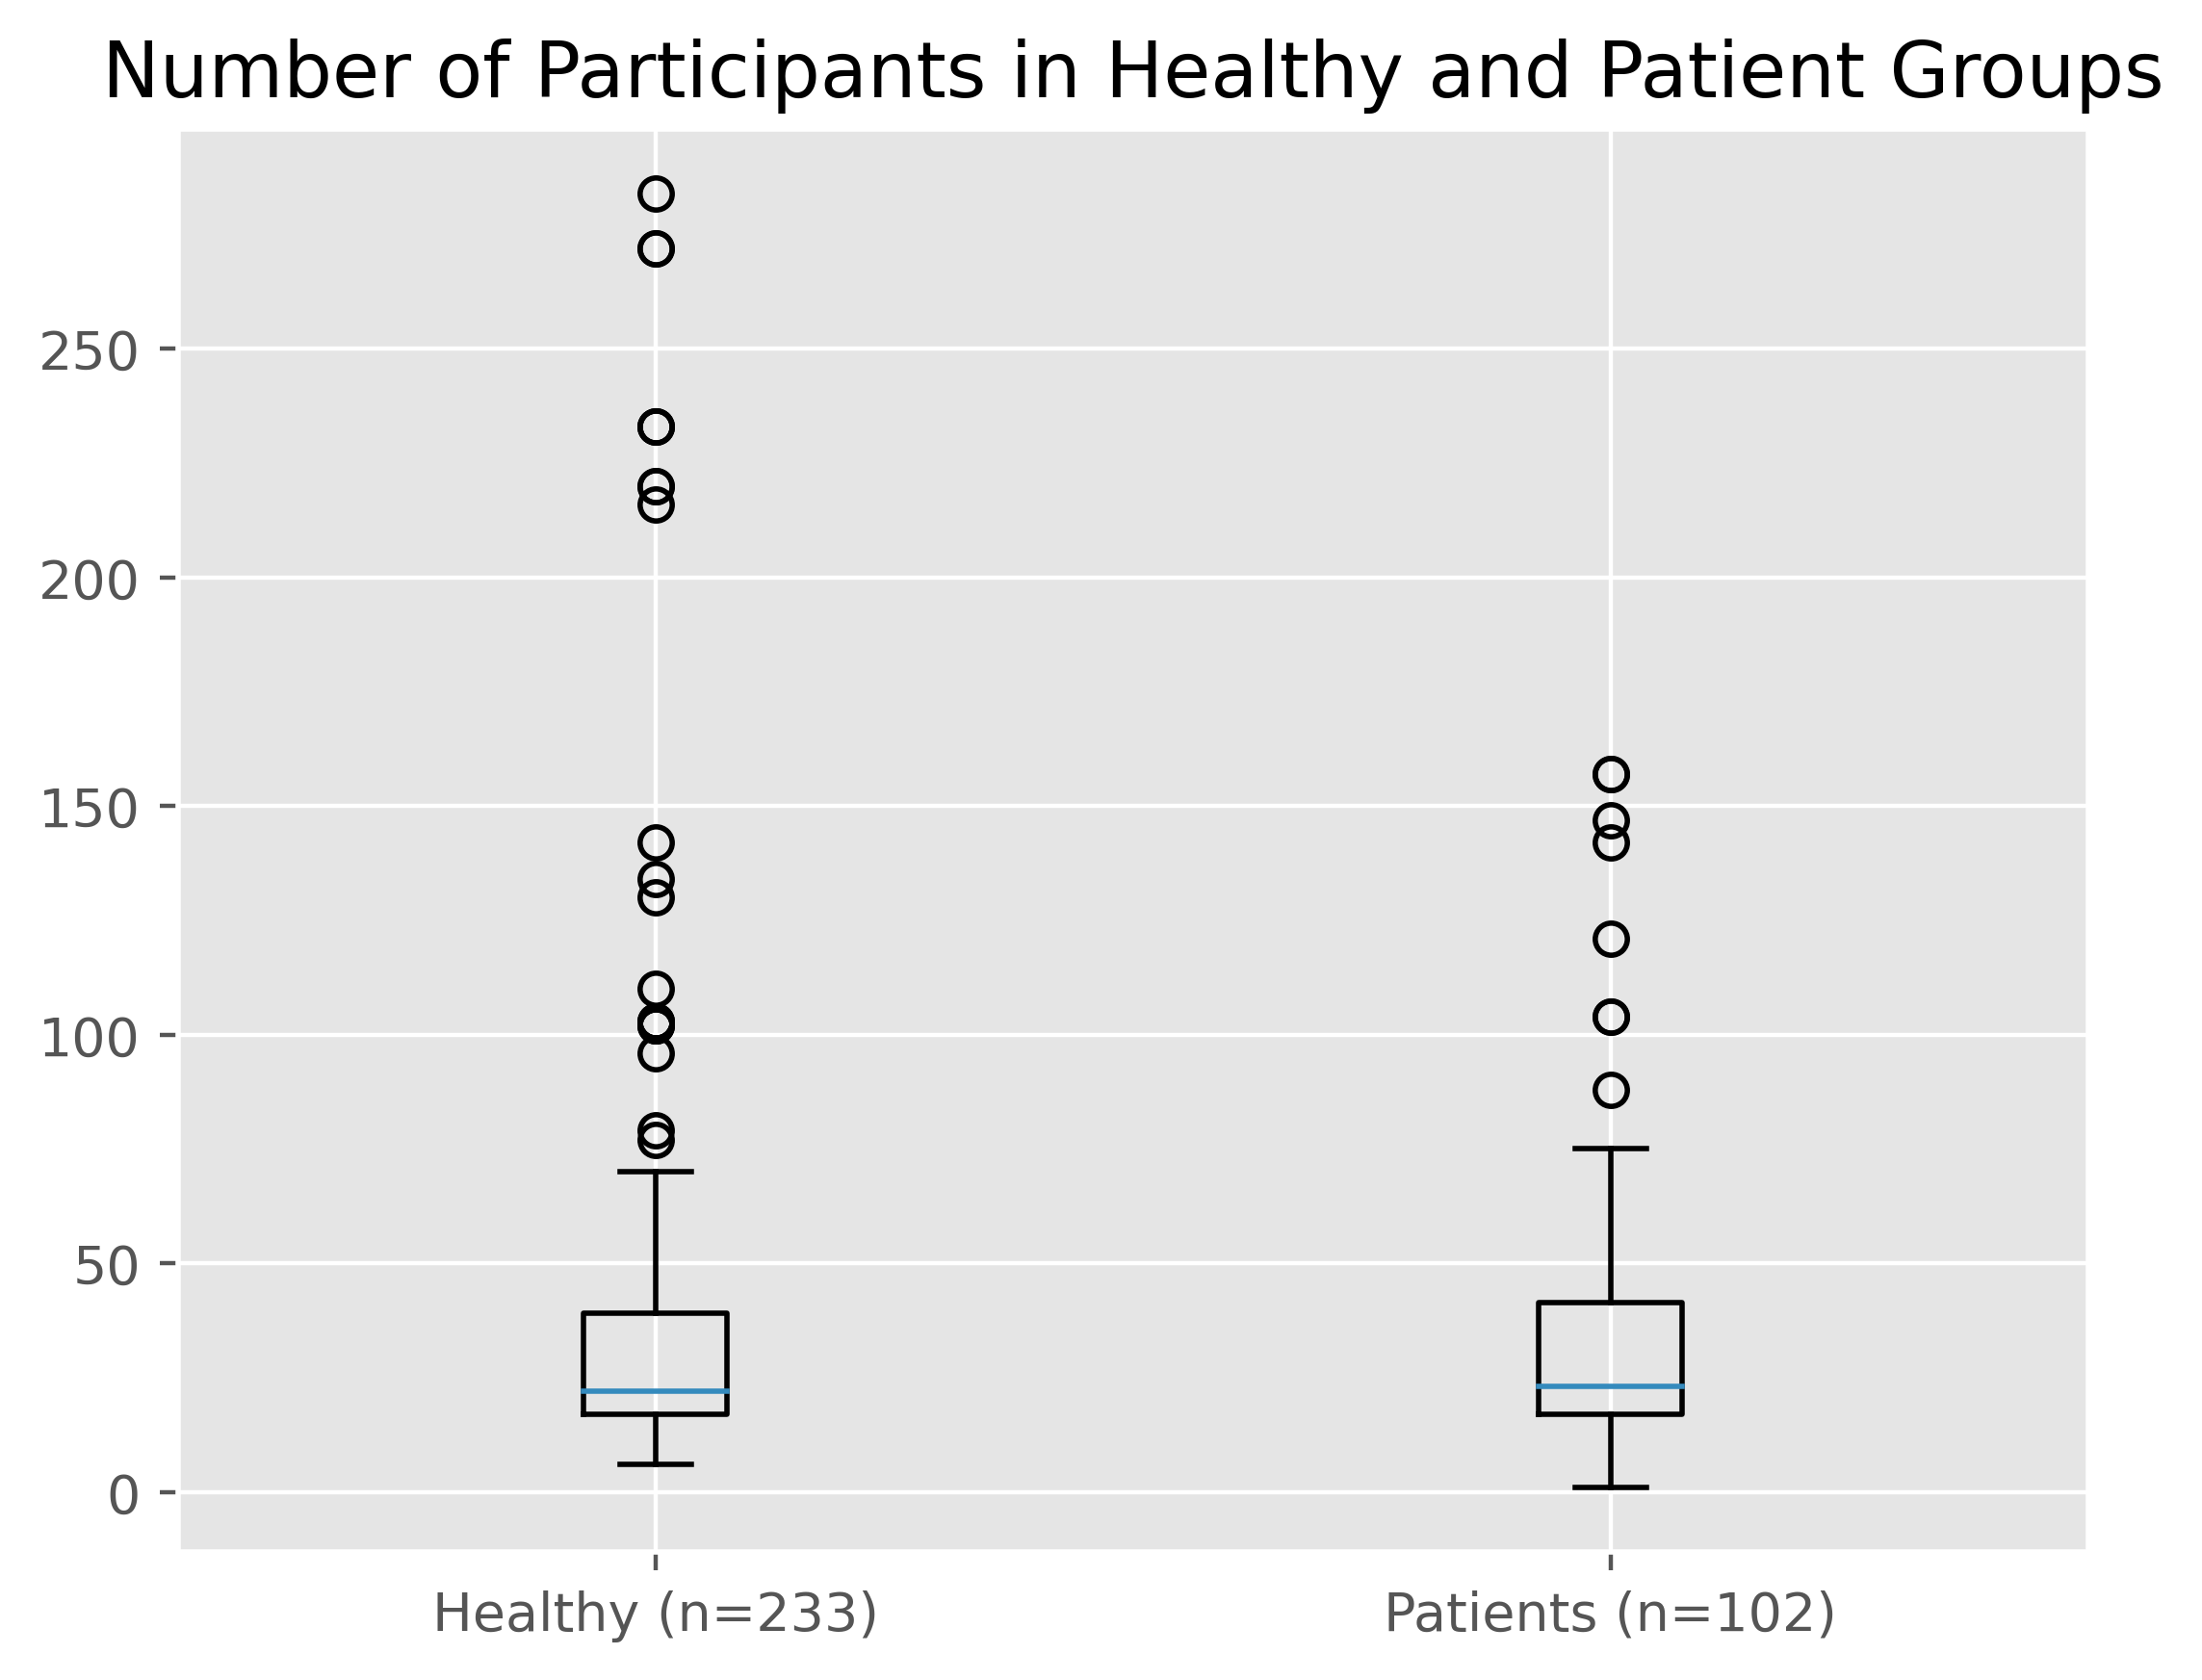

In [13]:
number_healthy = [list(complete_data[complete_data['pmcid'] == id]['count']) for id in only_healthy_ids]
number_patient = [list(complete_data[complete_data['pmcid'] == id]['count']) for id in only_patient_ids]

for id in healthy_patient_ids: 
    tdf = complete_data[complete_data['pmcid'] == id]
    number_healthy.append(list(tdf[tdf['group_name'] == 'healthy']['count']))
    number_patient.append(list(tdf[tdf['group_name'] == 'patients']['count']))

# Flatten the lists. 
number_healthy = reduce(lambda a,b:a+b, number_healthy)
number_patient = reduce(lambda a,b:a+b, number_patient)

# Remove outliers. 
def reject_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

number_healthy = reject_outliers(np.array(number_healthy))
number_patient = reject_outliers(np.array(number_patient))

print("Mean, SD Healthy:", np.mean(number_healthy), np.std(number_healthy))
print("Mean, SD Patient:", np.mean(number_patient), np.std(number_patient))

plt.figure(dpi=400)
plt.boxplot([number_healthy, number_patient], labels=[f"Healthy (n={len(number_healthy)})", f"Patients (n={len(number_patient)})"]);
plt.title(f"Number of Participants in Healthy and Patient Groups");

In [14]:
scipy.stats.ttest_ind(number_healthy, number_patient)

Ttest_indResult(statistic=0.4721963352307702, pvalue=0.6370959407599536)

Text(0.5, 0, 'Number of Participants')

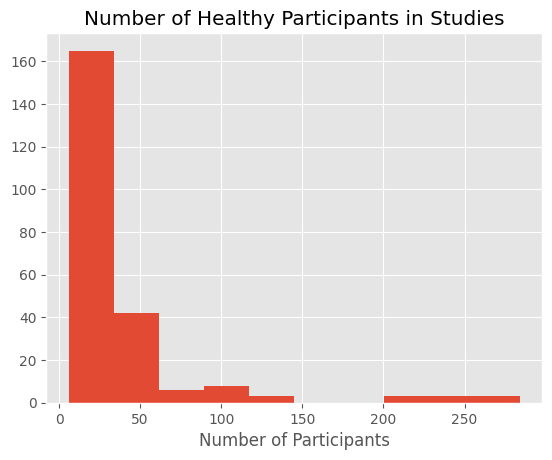

In [15]:
# plt.figure(dpi=400)
plt.hist(number_healthy)
plt.title(f"Number of Healthy Participants in Studies")
plt.xlabel("Number of Participants")

Text(0.5, 0, 'Number of Participants')

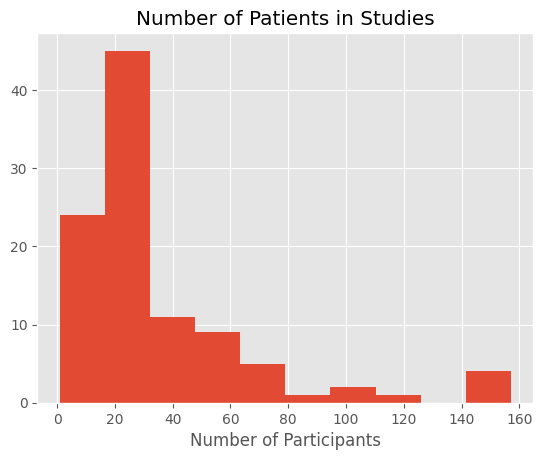

In [16]:
# plt.figure(dpi=400)
plt.hist(number_patient)
plt.title(f"Number of Patients in Studies")
plt.xlabel("Number of Participants")

Text(0.5, 0.98, 'Counts of Healthy and Patients in Studies')

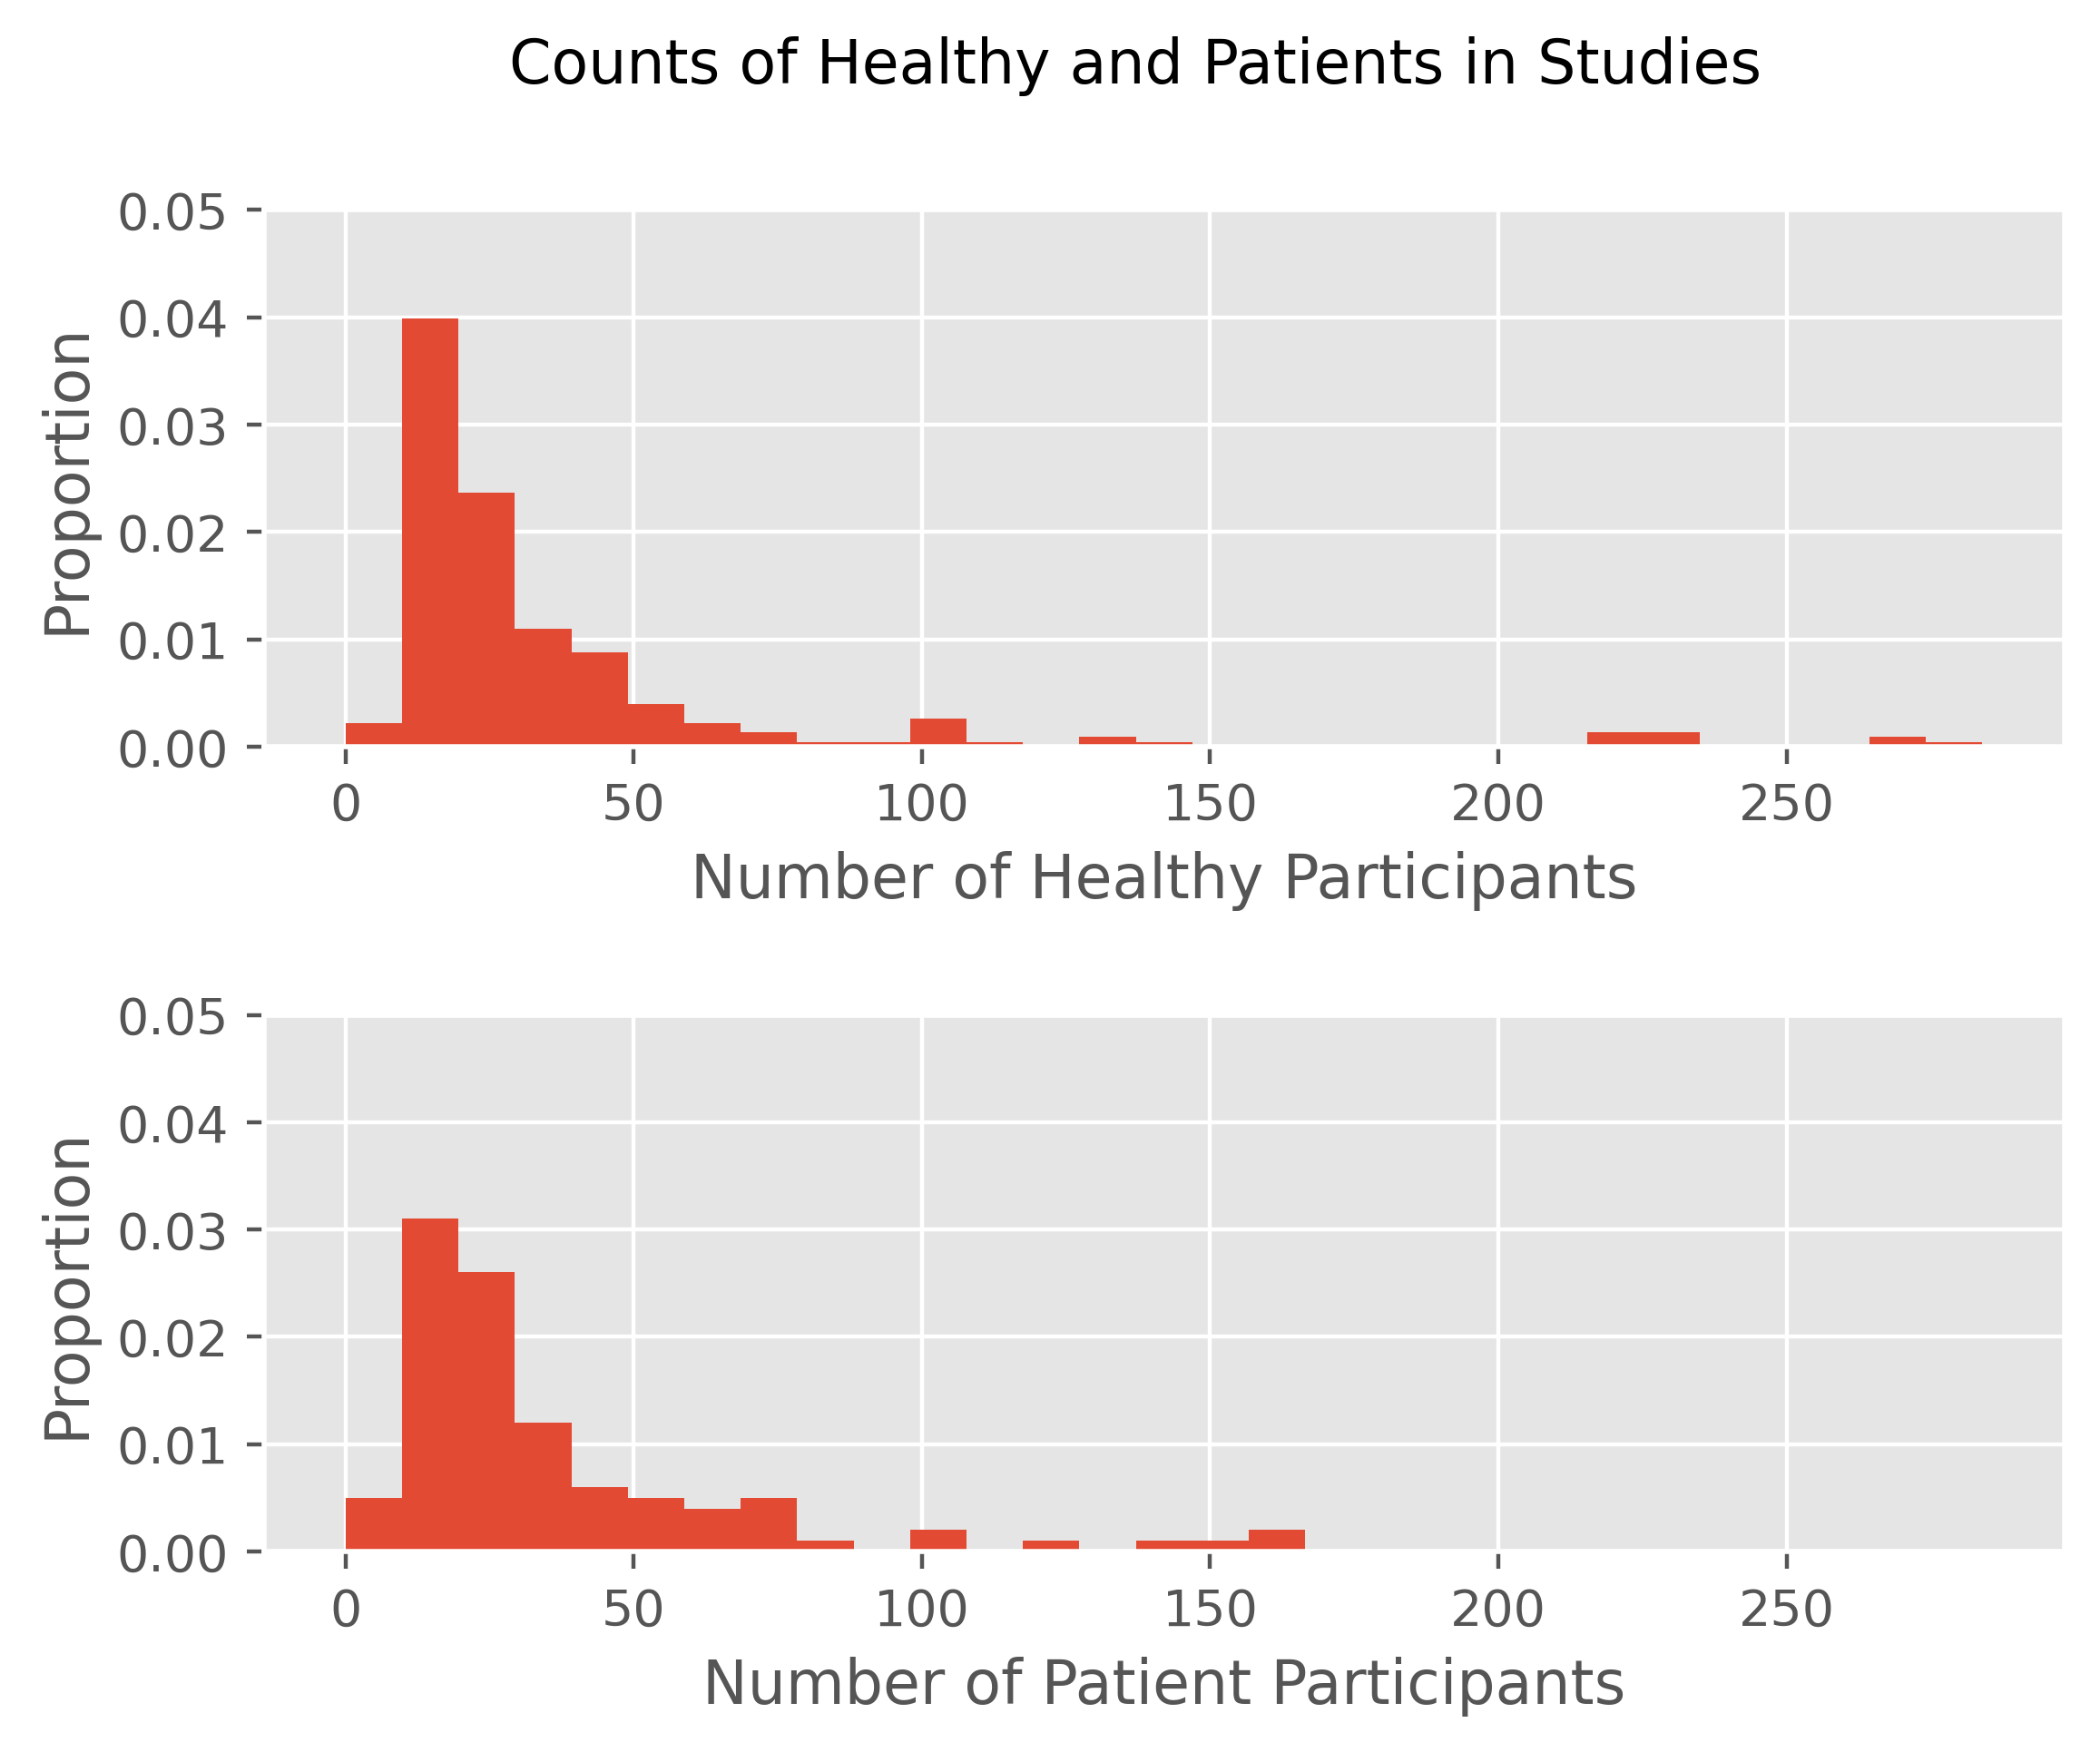

In [17]:
fig, axs = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)
fig.dpi = 400

max_val = np.max([np.max(number_healthy),np.max(number_healthy)])
bin_width = 10.0

axs[0].hist(number_healthy, range=(0, max_val), bins=int(np.ceil(max_val/bin_width)), density=True)
axs[0].set_xlabel("Number of Healthy Participants")
axs[0].set_ylabel("Proportion")
axs[1].hist(number_patient, range=(0, max_val), bins=int(np.ceil(max_val/bin_width)), density=True)
axs[1].set_xlabel("Number of Patient Participants")
axs[1].set_ylabel("Proportion")

axs[0].set_ybound(0.0, 0.05)
axs[1].set_ybound(0.0, 0.05)

fig.suptitle(f"Counts of Healthy and Patients in Studies")
# axs[1].title = f"Number of Patients in Studies (n={len(number_patient)})"
# axs[1].xlabel("Number of Participants")

Text(0.5, 0, 'Number of Participants')

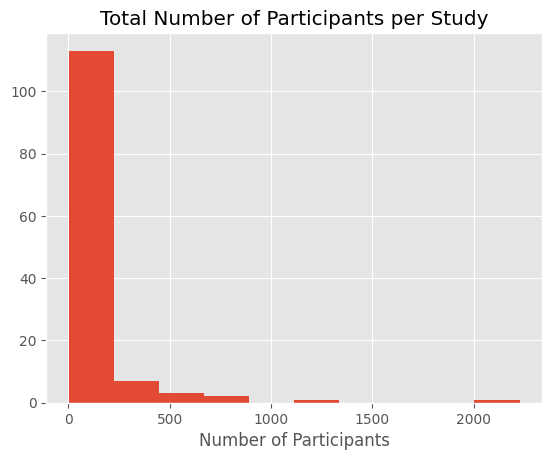

In [18]:
total_participants = []

for id in complete_data['pmcid'].unique(): 
    tdf = complete_data[complete_data['pmcid'] == id]
    total_participants.append(sum(tdf['count']))

plt.figure(dpi=100)
plt.hist(total_participants); 
plt.title("Total Number of Participants per Study")
plt.xlabel("Number of Participants")

Text(0, 0.5, 'Frequency')

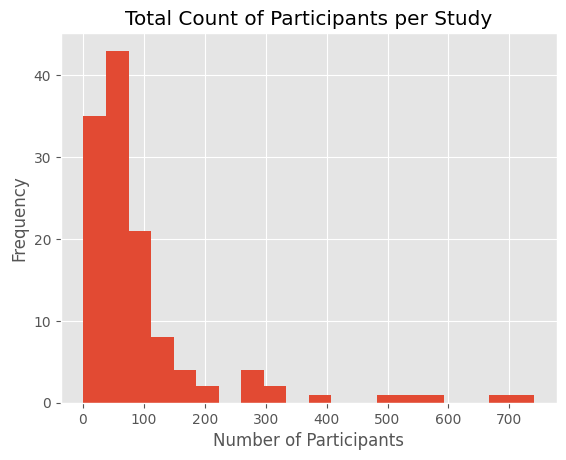

In [19]:
total_participants = []

for id in complete_data['pmcid'].unique(): 
    tdf = complete_data[complete_data['pmcid'] == id]
    total_participants.append(sum(tdf['count']))

total_participants = reject_outliers(np.array(np.array(total_participants)))

plt.figure(dpi=100)
plt.hist(total_participants, bins=20); 
plt.title("Total Count of Participants per Study")
plt.xlabel("Number of Participants")
plt.ylabel("Frequency")

Text(0.5, 0, 'Count of Participants')

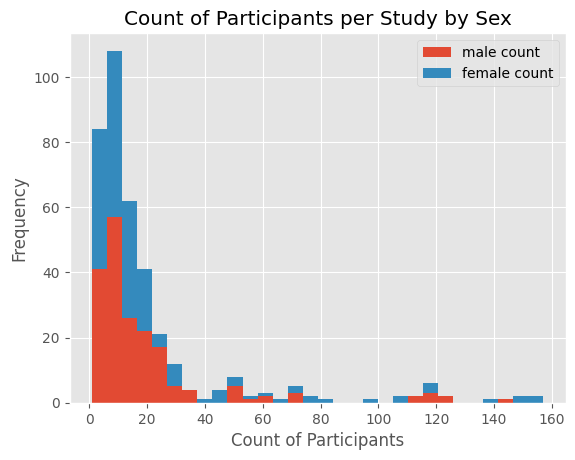

In [20]:
sex_data = subgroups[['male count', 'female count']]

sex_data.plot.hist(stacked=True, bins=30)
plt.title("Count of Participants per Study by Sex")
plt.xlabel("Count of Participants")